# Obtaining the Data

In [13]:
import cv2
import os
import numpy as np
import pandas as pd
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
home_path = os.getcwd()

### Finding the Data

First was gathering the data. I found two Data Sources, the All Age Faces[3] and the UTKFace (song) datasets that fit great for my project.  The dataset contained 13,322 images of mostly Asian subjects and the images were rotated to be upright.  This dataset spanned the ages of 2 to 80.  The UTKFace dataset[6] contained 22,045 usable images covering a more diverse group of subjects.  This dataset Contained subjects ages 0 to 116.

### Cleaning the Data

The UTKfaces dataset had age groups that ranged further out than my other dataset, AAF.  So to condense the ages down, I dropped all the images from the UTKfaces dataset that were under the age of 2 or over the age of 80

In [ ]:
os.chdir(home_path)

In [50]:
utk_path = r'DataSets\UTK'
utk_directory = 'UTKFace'
example_path = 'DataSets\Examples'
mislabeled_directory = 'mislabeled'
rotated_directory = 'Rotated'

In [ ]:
os.chdir(utk_path)
dir_list = os.listdir(utk_directory)
os.chdir(utk_directory)

In [ ]:
file_names = []
for file in dir_list:
    age = int(file.split('_')[0])
    if age < 2 or age > 80:    
        file_names.append(file)

In [ ]:
for file in file_names:
    filename = os.fsdecode(file)
    os.remove(filename)

In [ ]:
len(dir_list)

In [44]:
os.chdir(home_path)

In [45]:
os.chdir(example_path)
mislabeled_list = os.listdir(mislabeled_directory)
os.chdir(mislabeled_directory)

In [46]:
mislabeled_list

['2_0_0_20170104201100490.jpg.chip.jpg',
 '5_0_1_20170117193745507.jpg.chip.jpg',
 '76_0_1_20170116205556715.jpg.chip.jpg',
 '80_0_2_20170111210646563.jpg.chip.jpg',
 '8_0_0_20170117182551223.jpg.chip.jpg',
 'm-2_0_4_20161221202316873.jpg.chip.jpg']

Some of the images in the UTKFaces dataset were mislabled or misclassified as faces.  I went through and removed the most egregious ones. Below are a few examples:

The UTK dataset had a lot of mislabeled images.  Below we can see images labeled as 2, 5 and 8 years old that are clearly not within those categories. Some of the images were blury which could have caused them to be mislabled. There are also images that were not of faces at all.  I went through and removed the most egregious ones.

For future cleaning of the data, running this dataset through a different model that was trained on different data and comparing the estimates to the labels could help point out any mislables that I missed.  This could help verfiy the accuracy of the dataset I am using and boost accuracy on the final model.

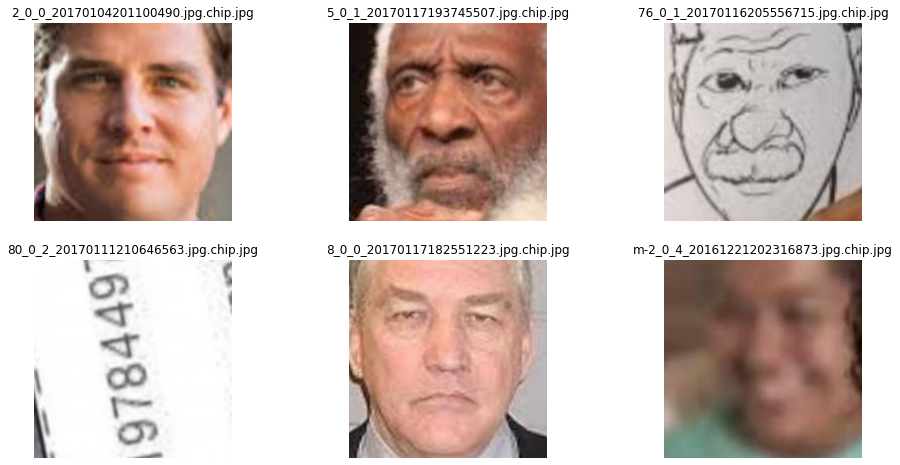

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
ax = ax.ravel()

for i in range(6):
    ax[i].axis('off')
    ax[i].imshow(Image.open(mislabeled_list[i]))
    ax[i].set_title(mislabeled_list[i])

### Data Augmentation

For augmenting the data, our clean images totaled at 35,367.  This was a good start but as I got further into training and researching, I realized a larger dataset would go a long way.  I had the option of finding another dataset of faces that had ages labeled, but in Agarwal’s [1] paper he had a lot of success by rotating the images and mirroring them, essentially giving us ten times as many data sources.  This increase of data points might not give the boost an additional dataset would, but it did increase our accuracy.

In [ ]:
os.chdir(home_path)

In [ ]:
data_path = r'DataSets'
og_directory = r'DataSets\\Faces'
og_path = r'DataSets\\Faces\\'

In [ ]:
dir_list = os.listdir(og_directory)

In [ ]:
full_path_list = []
for file in dir_list:
    full_path = f'Datasets\\Faces\\{file}'
    full_path_list.append(full_path)

This took quite a while to complete and I was glad I only had to go through the process once.  But now I was up to 353,670 data points for training.

In [ ]:
for file in dir_list:
    image = cv2.imread(f'{og_path}{file}')
    flipped = np.fliplr(image)
    
    cv2.imwrite(f'Datasets\\Augmented Faces\\o-{file}', image)
    cv2.imwrite(f'Datasets\\Augmented Faces\\p20-{file}', (ndimage.rotate(image, 20, reshape=False)))
    cv2.imwrite(f'Datasets\\Augmented Faces\\p40-{file}', (ndimage.rotate(image, 40, reshape=False)))
    cv2.imwrite(f'Datasets\\Augmented Faces\\n20-{file}', (ndimage.rotate(image, -20, reshape=False)))
    cv2.imwrite(f'Datasets\\Augmented Faces\\n40-{file}', (ndimage.rotate(image, -40, reshape=False)))
    
    cv2.imwrite(f'Datasets\\Augmented Faces\\m-{file}', image)
    cv2.imwrite(f'Datasets\\Augmented Faces\\mp20-{file}', (ndimage.rotate(flipped, 20, reshape=False)))
    cv2.imwrite(f'Datasets\\Augmented Faces\\mp40-{file}', (ndimage.rotate(flipped, 40, reshape=False)))
    cv2.imwrite(f'Datasets\\Augmented Faces\\mn20-{file}', (ndimage.rotate(flipped, -20, reshape=False)))
    cv2.imwrite(f'Datasets\\Augmented Faces\\mn40-{file}', (ndimage.rotate(flipped, -40, reshape=False)))

In [65]:
os.chdir(home_path)

In [66]:
os.chdir(example_path)
rotated_list = os.listdir(rotated_directory)
os.chdir(rotated_directory)

In [68]:
for file in rotated_list:
    if 'desktop' in file:
        rotated_list.remove(file)

Rotating the images gave me a lot more data points to work with, below is one image and all the rotations that it wen through.

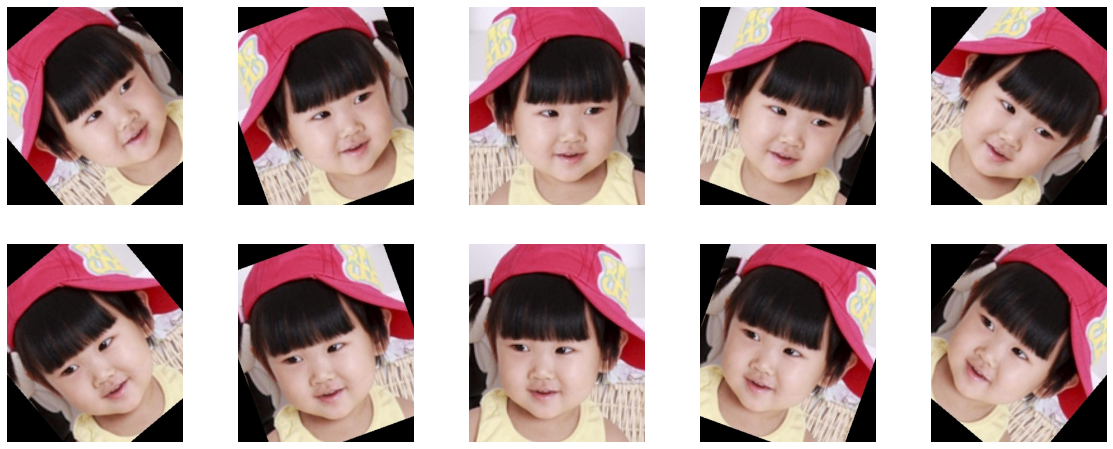

In [69]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,8))
ax = ax.ravel()

for i in range(10):
    ax[i].axis('off')
    ax[i].imshow(Image.open(rotated_list[i]))

In [ ]:
def age_categories(age):
    category = ''
    if age <= 17:
        category = 0
    elif 18 <= age <= 24:
        category = 1
    elif 25 <= age <= 29:
        category = 2
    elif 30 <= age <= 40:
        category = 3
    elif 40 <= age <= 54:
        category = 4
    elif 55 <= age:
        category = 5
    return category

In [ ]:
groups = {0:'2 to 17',
          1:'18 to 24',
          2:'25 to 29',
          3:'30 to 40',
          4:'40 to 54',
          5:'55 to 80'
}

The datasets had two different naming conventions used so I used the below function to differntiate between the two types and isolate the age.  I then used the dictionary `groups` to categorize the ages.

In [ ]:
def create_file_df(file_list, path):
    col_names = ['File','Age','Group']
    df = pd.DataFrame(columns = col_names)
    for file in file_list:
        if '_' in file:
            #age = int(file.split('_')[0])
            age = int((file.split('-')[1]).split('_')[0])
        else:
            age = int(file[-6:-4])
        group = age_categories(age)
        file_path = path + '\\' + file
        row = pd.Series([file_path, age, group], index=col_names)
        df = df.append(row, ignore_index=True)
    return df

In [ ]:
faces_path = r'DataSets\Augmented Faces'
faces_file_list = os.listdir(faces_path)
df = create_file_df(faces_file_list, faces_path)
df.to_csv('faces_files.csv')